In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append('../')
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('../tests/test.csv', squeeze=True, index_col=0, parse_dates=True)
fig = plt.figure(figsize=(15, 3))
plt.plot(series.index, series.values)

FileNotFoundError: File b'../tests/test.csv' does not exist

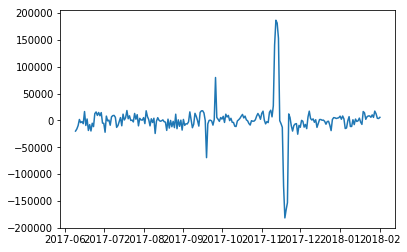

In [26]:
diff = series.diff(365).diff(7)
plt.plot(series.index, diff.values)

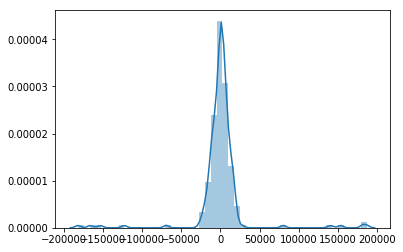

In [27]:
import seaborn as sns
sns.distplot(diff.dropna().values)


In [9]:
import numpy as np
np.nanargmax(series.copy())

529

In [3]:
import anomaly

detector = anomaly.AnomalyDetector(series)
detector.fit(period=None)
detector.plot()

[ 74207  58677  59662  50177  74121  74657  72174  87254  71905  70559
  56491  79854  68277  75599  66858  77823  66975  70765  85814  85535
  79492  76021  69738  58626  66315  77232  85167  70970  86161  75154
  76593  61443  85728  85718  79305  82217  68822  66468  56115  93446
  93733  89090  77178  76839  57597  54305  85640  71286  76997  71023
  82378  60481  58607  76168  74220  74837  83509  77544  56154  62651
  75748  85648  71849  85307  76661  65508  57782  82648  82504  78825
  77145  71474  64970  59039  80435  76681  81366  76731  87137  66125
  70103  79831  83751  73658  83234  69231  72163  59973  83111  79914
  87457  75125  74353  75368  59977  88167  77955  91041  93903  86984
  66412  63934  87037  81071  79202  83273  76882  61766  63873 154752
  89853  79996  85525  73669  64425  63242  80336  81308  77632  84395
  70467  65213  57319  83670  76833  79322  81492  73604  60856  59393
  85867  79130  83981  76134  69310  61176  59641  76745  78346  75584
  7699

ValueError: cannot convert float NaN to integer

In [12]:
import scipy as sp

In [15]:
alpha = 0.05
significance = alpha / series.size
deviation = sp.stats.t.isf(significance, series.size-2)
deviation

3.7926478282237515

## Another test

In [5]:
import datetime 

def load_df():
    df = pd.read_csv('../../../playground/data/TV_POC.CSV')
    df.date = pd.to_datetime(df.date)
    df.index = df.apply(lambda x: x.date + datetime.timedelta(hours=x.hours, minutes=x.minutes*5), axis=1)
    df['y'] = df.converting_touchpoints
    df['p'] = df.programmes#_dummy
    df['logy'] = df.y.apply(np.log1p)
    df = df.drop(columns=['date', 'converting_touchpoints', 'programmes', 'programmes_dummy', 'minutes', 'hours'])
    df['weekday'] = df.index.weekday.astype('category')
    df['hours'] = df.index.hour.astype('category')
    df['minutes'] = df.index.minute.astype('category')
    return df

In [55]:
df = load_df()
df.head()

,credit_card,current_account,mortgages,y,p,logy,weekday,hours,minutes
2017-12-01 00:05:00,79,62,65,14,0,2.708050,4,0,5
2017-12-01 00:10:00,79,62,65,25,0,3.258097,4,0,10
2017-12-01 00:15:00,79,62,65,24,0,3.218876,4,0,15
2017-12-01 00:20:00,79,62,65,19,0,2.995732,4,0,20
2017-12-01 00:25:00,79,62,65,15,0,2.772589,4,0,25


In [70]:
import anomaly

series = df.y[:-1]
series = series.resample('1080T').mean()
series.head()

2017-12-01 00:00:00    37.323276
2017-12-01 18:00:00    28.918455
2017-12-02 12:00:00    27.745690
2017-12-03 06:00:00    36.897436
2017-12-04 00:00:00    34.987179
Freq: 1080T, Name: y, dtype: float64

In [69]:
detector = anomaly.AnomalyDetector(series)
detector.detrend(how='linear')
detector.fit(period=4)
detector.plot()

ValueError: period 4 seasonality could not be extracted from the data